# Valve PWM Test

1. Analyze the mapping from duty cycle to steady-state velocity
    1. A plot for each actuator with ss velocity vs. duty cycle
    1. Find balance point for valves, or duty_mid value
1. Analyze the dynamic response of the valves
    1. velocity vs. time for each actuator

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
mpl.style.use('mitch-exp')

In [53]:
ls

SISO Controllers.ipynb    pot_calibrate_05_11.csv   valve-pwm-velocity.ipynb
dh_kinematics.html        rotary-valve-gain.ipynb   vel_test_1.csv
figs/                     single-actuator.ipynb     vel_test_2.csv
img/                      string-pot.ipynb


In [54]:
data = pd.read_csv('vel_test_2.csv').set_index('Total Time')
data.head()

,Loop Time,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Flag,Actuator
Total Time,,,,,,,,,,,
0.095310,0.042793,5.9,6.9,7.05,7.5,8.557208,8.779538,7.102583,0.0,1,0
0.130437,0.077920,5.9,6.9,7.05,7.5,8.590000,8.779538,7.102583,0.0,0,0
0.160500,0.107984,5.9,6.9,7.05,7.5,8.557208,8.779538,7.077792,0.0,0,0
0.200605,0.148089,5.9,6.9,7.05,7.5,8.557208,8.779538,7.102583,0.0,0,0
0.236442,0.183924,5.9,6.9,7.05,7.5,8.557208,8.745808,7.102583,0.0,0,0


In [55]:
raw = data.values
ind = np.where(raw[:, -2])[0]
ind

array([    0,   143,   287,   471,   668,   866,  1064,  1262,  1461,
        1659,  1857,  2055,  2253,  2451,  2649,  2848,  3047,  3245,
        3443,  3641,  3839,  4037,  4236,  4434,  4633,  4753,  4952,
        5150,  5348,  5546,  5745,  5874,  6072,  6269,  6467,  6665,
        6863,  7023,  7221,  7377,  7497,  7695,  7894,  8062,  8260,
        8378,  8498,  8696,  8895,  9068,  9266,  9385,  9583,  9782,
        9981, 10147, 10346, 10466, 10665, 10863, 11062, 11224, 11422,
       11589, 11782, 11980, 12177, 12343, 12541, 12733, 12921, 13120,
       13318, 13490, 13689, 13880, 14062, 14260, 14458, 14638, 14836,
       15028, 15210, 15409, 15608, 15807, 16005])

In [56]:
raw_split = np.split(raw, ind)
raw_split.pop(0)
raw_split[0].shape

(143, 11)

# Analyze Steady-State Velocity

Plot all movements and trim for steady-state velocity.

In [57]:
import exc_analysis.plotting as excplt

In [61]:
dfs = []
for i, rs in enumerate(raw_split):
    dfs.append(pd.DataFrame(rs))
    dfs[i].columns = [u'Time', u'Boom Cmd', u'Stick Cmd', u'Bucket Cmd', 
                      u'Swing Cmd', u'Boom Ms', u'Stick Ms', u'Bucket Ms', 
                      u'Swing Ms', u'Flag', u'Actuator']
    dfs[i].set_index(u'Time', inplace=True)

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Flag,Actuator
Time,,,,,,,,,,
0.042793,5.9,6.9,7.05,7.5,8.557208,8.779538,7.102583,0.0,1.0,0.0
0.077920,5.9,6.9,7.05,7.5,8.590000,8.779538,7.102583,0.0,0.0,0.0
0.107984,5.9,6.9,7.05,7.5,8.557208,8.779538,7.077792,0.0,0.0,0.0
0.148089,5.9,6.9,7.05,7.5,8.557208,8.779538,7.102583,0.0,0.0,0.0
0.183924,5.9,6.9,7.05,7.5,8.557208,8.745808,7.102583,0.0,0.0,0.0


In [66]:
labels = ['Boom Ms', 'Stick Ms', 'Bucket Ms']

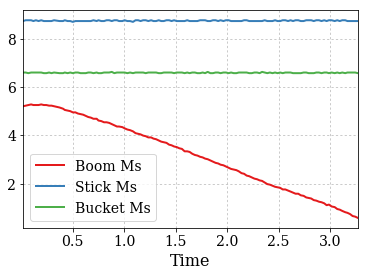

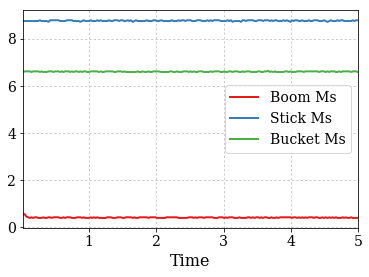

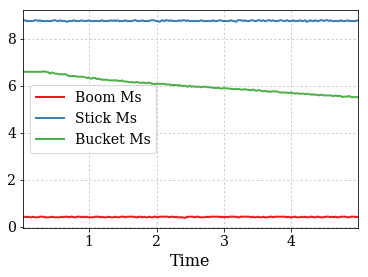

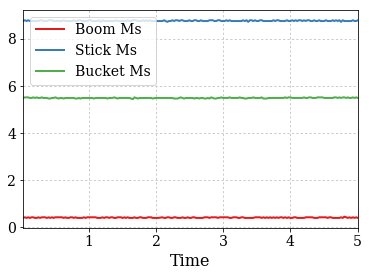

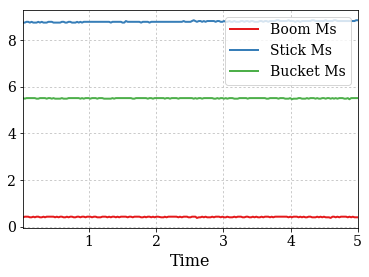

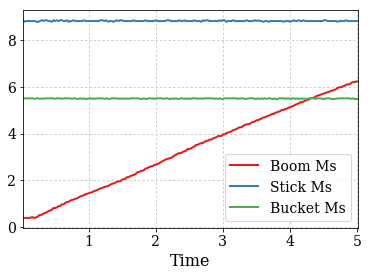

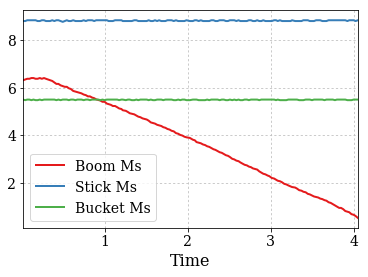

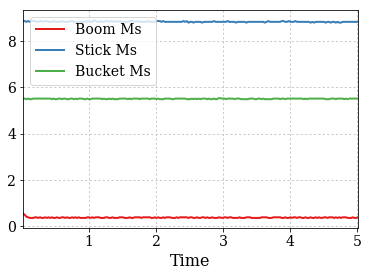

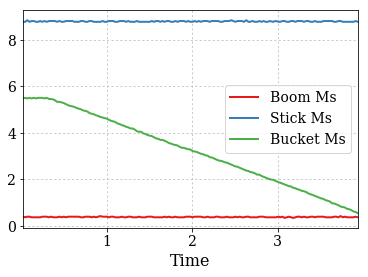

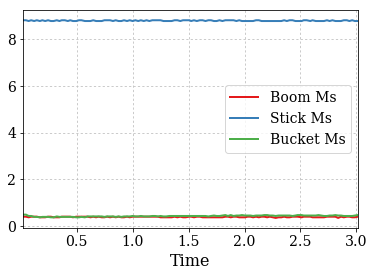

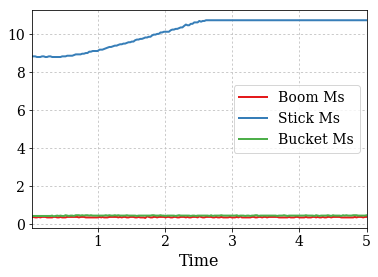

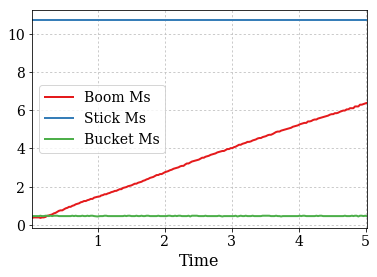

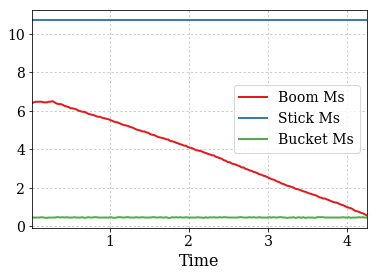

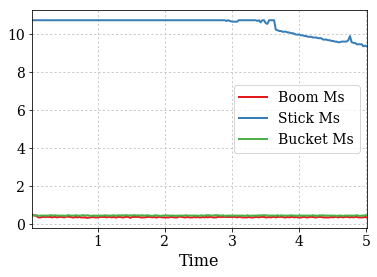

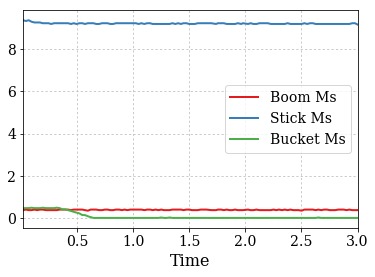

In [73]:
for i in range(15):
    plt.figure()
    dfs[i + 30][['Boom Ms', 'Stick Ms', 'Bucket Ms']].plot()

In [82]:
dfs[0]['Boom Ms'].iloc[30:-30]

Time
1.052486    8.590000
1.090832    8.557208
1.116990    8.590000
1.152492    8.590000
1.190609    8.557208
1.220611    8.590000
1.254508    8.524417
1.290080    8.557208
1.320626    8.557208
1.351264    8.557208
1.382656    8.590000
1.418500    8.590000
1.455292    8.590000
1.490056    8.557208
1.525205    8.590000
1.560255    8.590000
1.593601    8.557208
1.633487    8.590000
1.665767    8.590000
1.702565    8.557208
1.736834    8.557208
1.774967    8.590000
1.810903    8.557208
1.850779    8.590000
1.883509    8.590000
1.914844    8.590000
1.955559    8.590000
1.992431    8.557208
2.025882    8.590000
2.063963    8.557208
              ...   
2.915797    8.557208
2.952943    8.557208
2.988517    8.590000
3.021330    8.557208
3.054533    8.557208
3.092481    8.590000
3.134404    8.557208
3.171716    8.557208
3.208148    8.557208
3.236757    8.557208
3.271761    8.590000
3.303848    8.557208
3.334030    8.590000
3.366976    8.557208
3.394203    8.590000
3.431925    8.557208
3.476312

In [77]:
# Build dfs for each actuator
bm_dfs = []
sk_dfs = []
bk_dfs = []
container = [bm_dfs, sk_dfs, bk_dfs]

for df in dfs:
    container[int(df['Actuator'].values[0])].append(df)
    
for item in container:
    print(len(item))

29
29
29


In [ ]:
df.rolling()

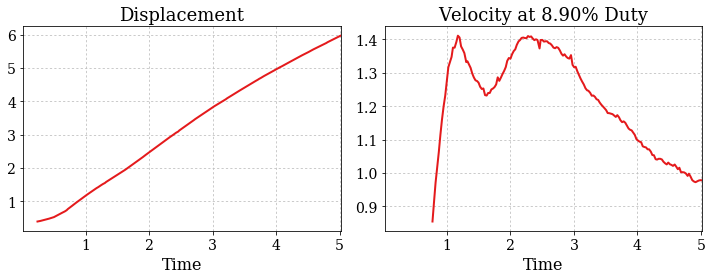

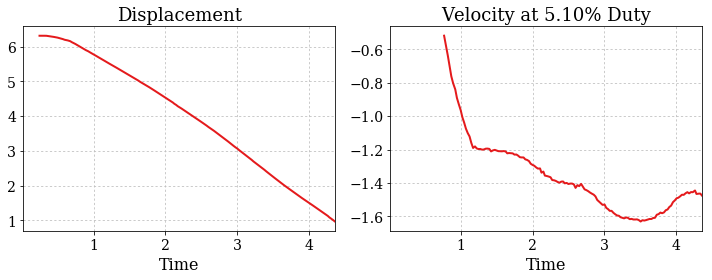

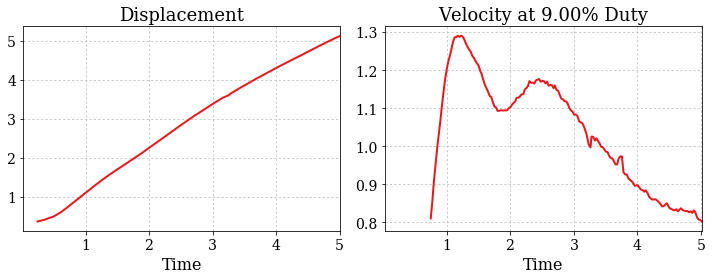

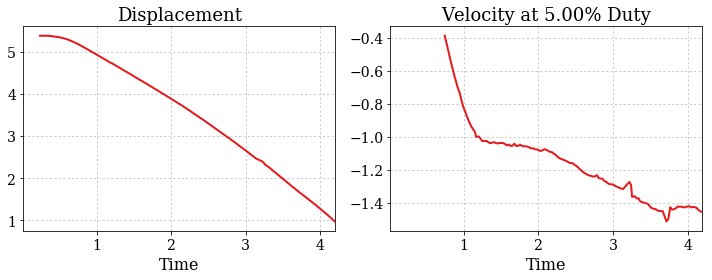

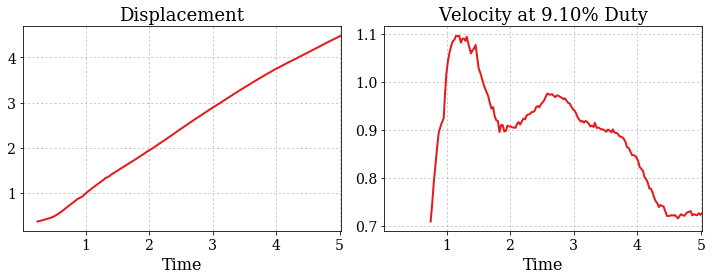

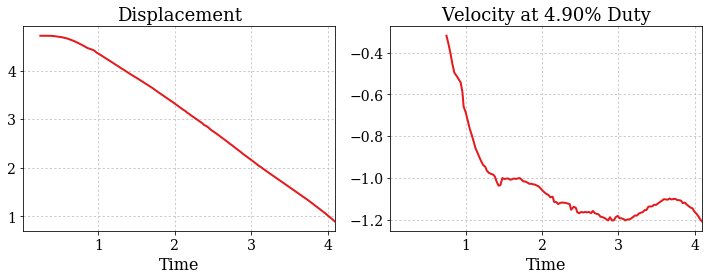

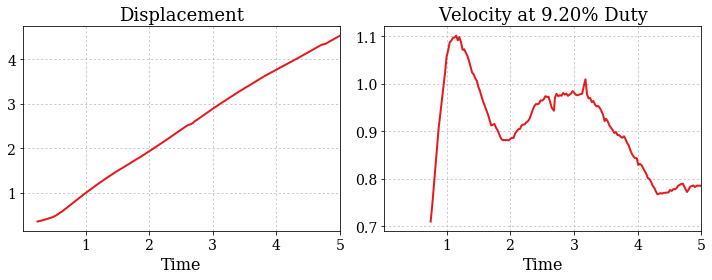

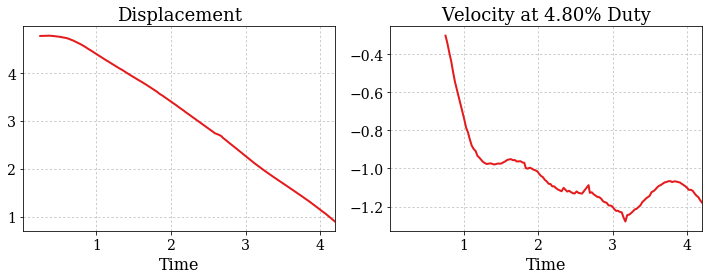

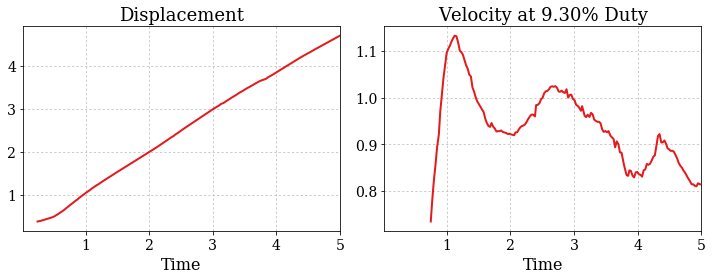

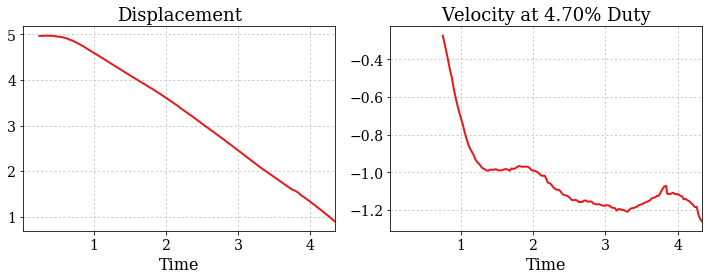

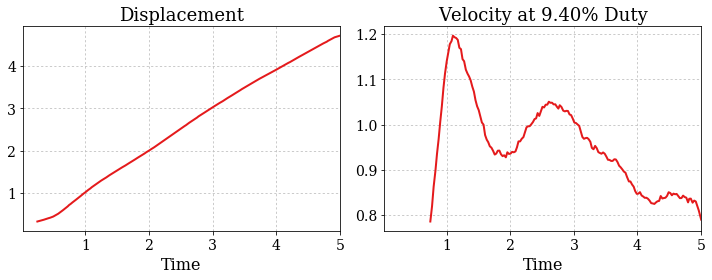

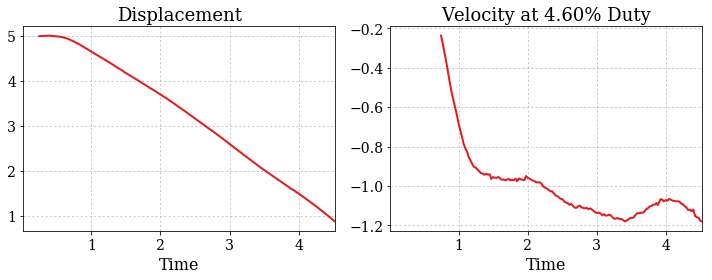

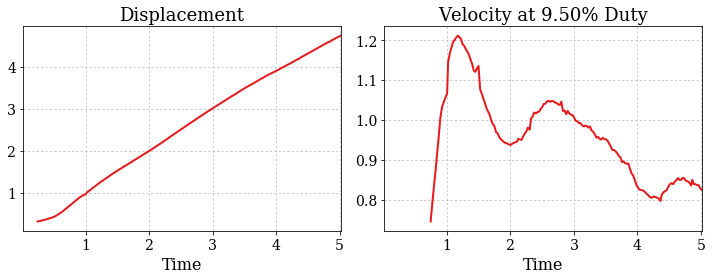

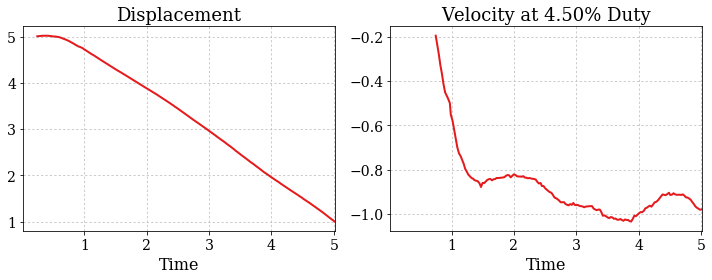

In [234]:
for i in range(15, 29):
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.title('Displacement')
    bm_dfs[i]['Boom Ms'].rolling(window=20, min_periods=10).mean().plot()
    plt.subplot(122)
    plt.title('Velocity at %.2f%% Duty' % bm_dfs[i]['Boom Cmd'].values[0])
    (bm_dfs[i]['Boom Ms'].rolling(window=20, min_periods=10).mean().diff() / bm_dfs[i].index.to_series().diff().values).rolling(window=20, min_periods=20).mean().plot()
    plt.tight_layout()

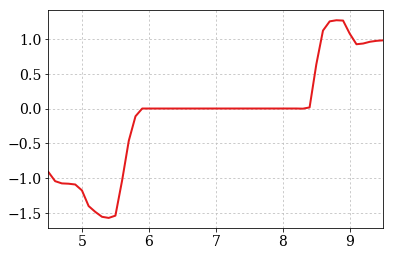

In [155]:
bm_map = np.zeros((len(bm_dfs), 2))

for i, df in enumerate(bm_dfs):
    bm_map[i, 0] = df['Boom Cmd'].values[0]  # duty cycle
    bm_map[i, 1] = (df['Boom Ms'].rolling(window=20, min_periods=10).mean().diff() / df.index.to_series().diff().values).iloc[30:-30].mean()

bm_map_df = pd.Series(bm_map[:, 1], bm_map[:, 0]).sort_index()
bm_map_df.plot()

In [207]:
bm_map_df

4.5   -0.913212
4.6   -1.043476
4.7   -1.075443
4.8   -1.080055
4.9   -1.091245
5.0   -1.175725
5.1   -1.400986
5.2   -1.485210
5.3   -1.555445
5.4   -1.571400
5.5   -1.538678
5.6   -1.033816
5.7   -0.462179
5.8   -0.111189
5.9    0.000047
8.2    0.000325
8.3   -0.001891
8.4    0.015884
8.5    0.632175
8.6    1.120092
8.7    1.252163
8.8    1.268298
8.9    1.263612
9.0    1.074577
9.1    0.923515
9.2    0.933892
9.3    0.959015
9.4    0.972597
9.5    0.979838
dtype: float64

___

# Stick Actuator

In [117]:
sk_dfs.sort(key=lambda x: x['Stick Cmd'].values[0])

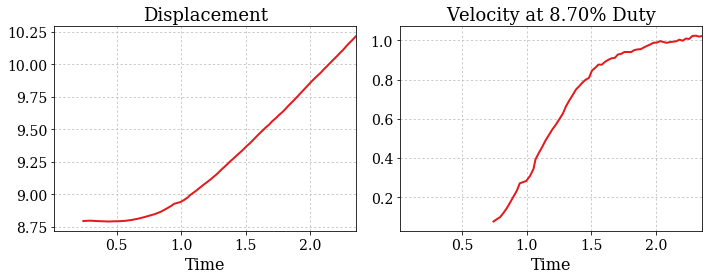

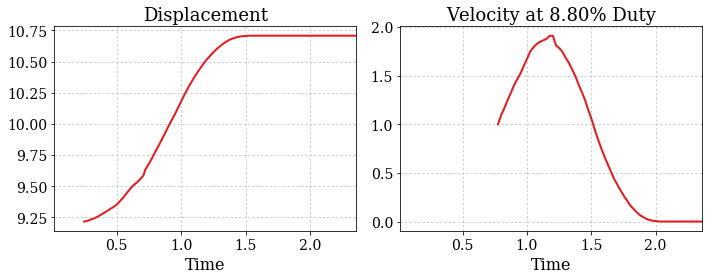

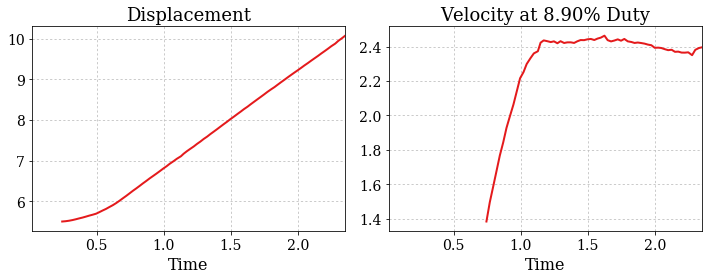

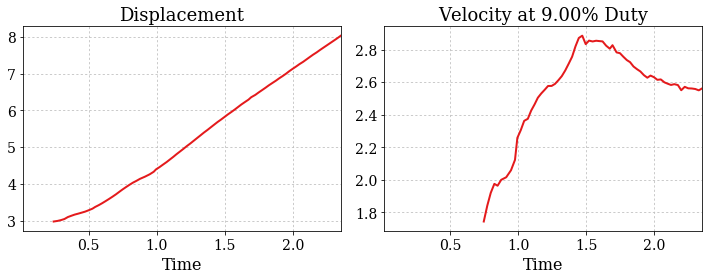

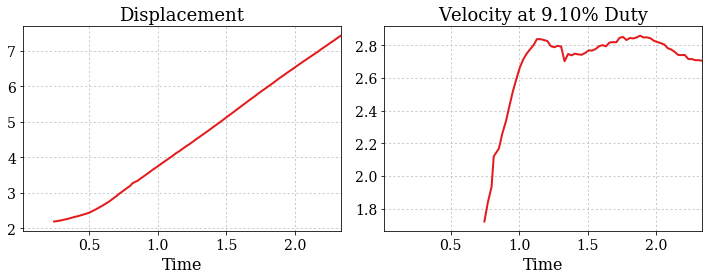

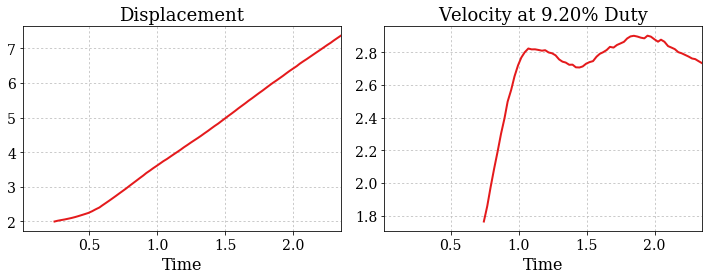

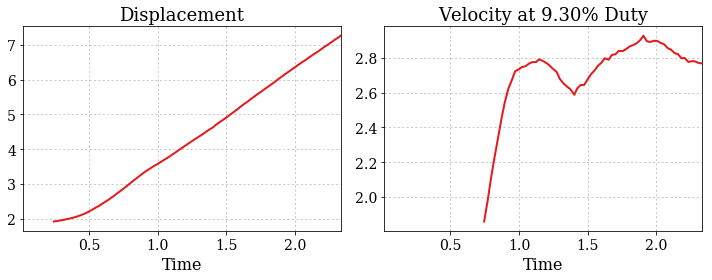

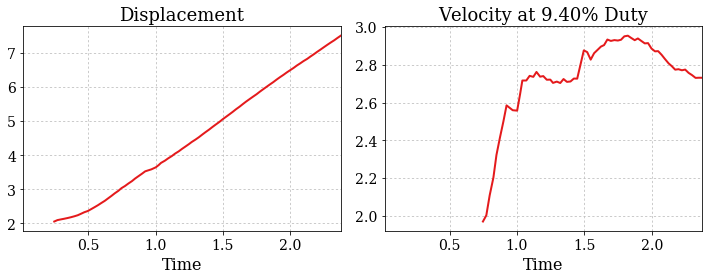

In [158]:
for i in range(21, 29):
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.title('Displacement')
    sk_dfs[i]['Stick Ms'].rolling(window=20, min_periods=10).mean().iloc[:-105].plot()
    plt.subplot(122)
    plt.title('Velocity at %.2f%% Duty' % sk_dfs[i]['Stick Cmd'].values[0])
    (sk_dfs[i]['Stick Ms'].rolling(window=20, min_periods=10).mean().diff() / sk_dfs[i].index.to_series().diff().values).iloc[:-105].rolling(window=20, min_periods=20).mean().plot()
    plt.tight_layout()

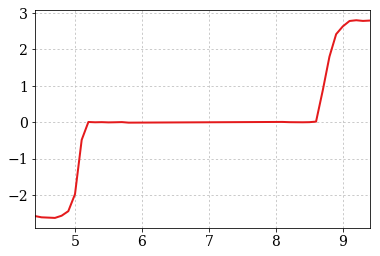

In [159]:
# 0.0333 s per loop
sk_map = np.zeros((len(sk_dfs), 2))

# First 21
for i, df in enumerate(sk_dfs[:21]):
    sk_map[i, 0] = df['Stick Cmd'].values[0]  # duty cycle
    sk_map[i, 1] = (df['Stick Ms'].rolling(window=20, min_periods=10).mean().diff() / df.index.to_series().diff().values).iloc[105:-30].mean()

# Last 9
for i, df in enumerate(sk_dfs[21:]):
    sk_map[i + 21, 0] = df['Stick Cmd'].values[0]  # duty cycle
    sk_map[i + 21, 1] = (df['Stick Ms'].rolling(window=20, min_periods=10).mean().diff() / df.index.to_series().diff().values).iloc[30:-105].mean()

# quick fix
sk_map[22, 1] = 1.8
    
sk_map_df = pd.Series(sk_map[:, 1], sk_map[:, 0])
sk_map_df.plot()

In [208]:
sk_map_df

4.4   -2.580148
4.5   -2.615377
4.6   -2.623463
4.7   -2.631898
4.8   -2.571731
4.9   -2.446459
5.0   -1.979294
5.1   -0.486760
5.2    0.004372
5.3   -0.003498
5.4    0.000125
5.5   -0.006518
5.6   -0.003177
5.7    0.001370
5.8   -0.013643
8.1    0.006037
8.2   -0.000515
8.3   -0.002119
8.4   -0.003554
8.5   -0.000537
8.6    0.014390
8.7    0.870947
8.8    1.800000
8.9    2.417785
9.0    2.632484
9.1    2.780186
9.2    2.800582
9.3    2.782063
9.4    2.791646
dtype: float64

___

# Bucket Actuator

In [150]:
df.index.to_series().diff().dropna().values.mean()

0.025198217594281314

In [134]:
bk_dfs.sort(key=lambda x: x['Bucket Cmd'].values[0])

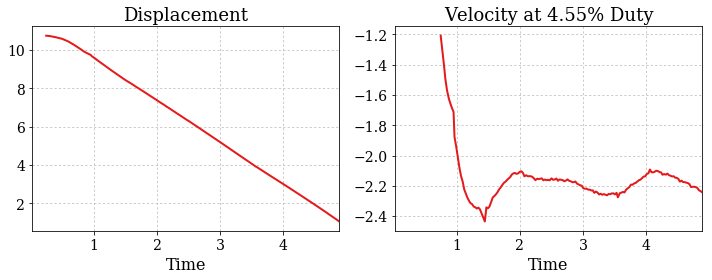

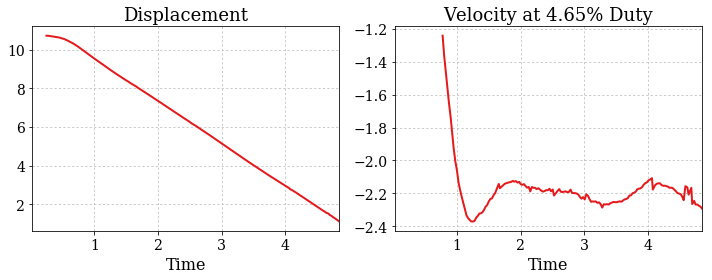

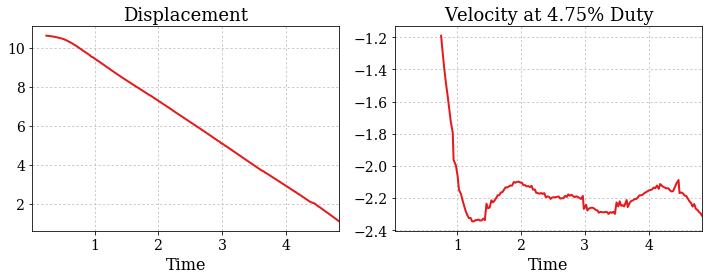

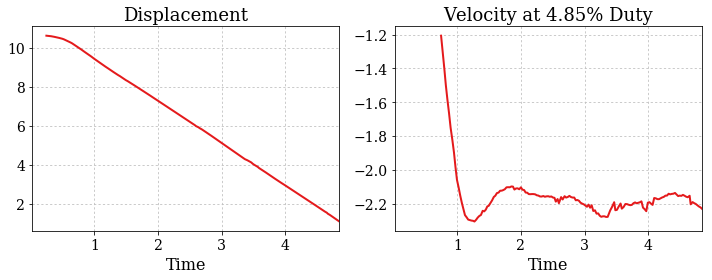

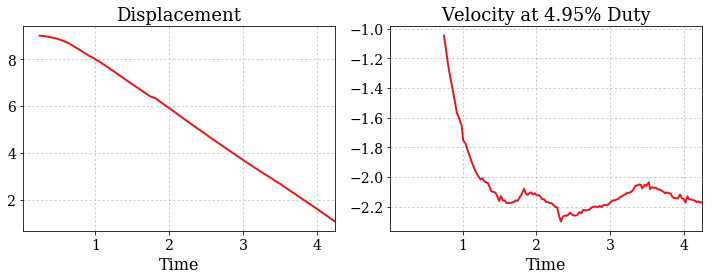

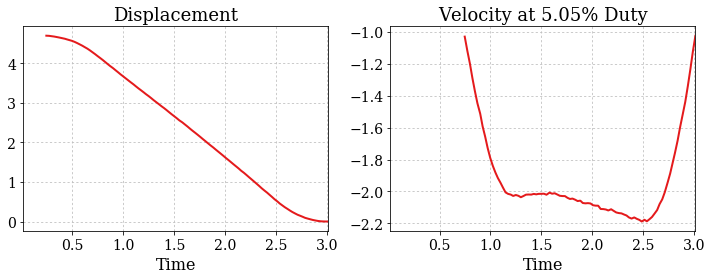

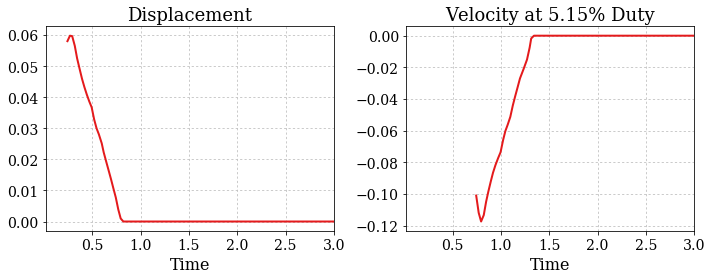

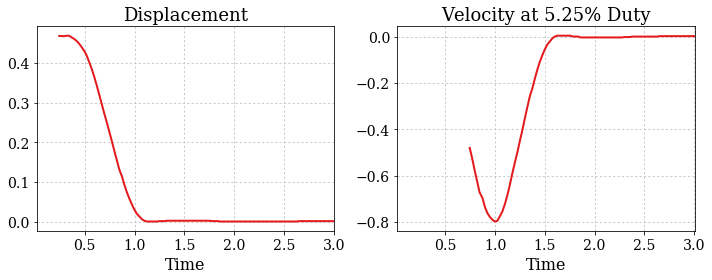

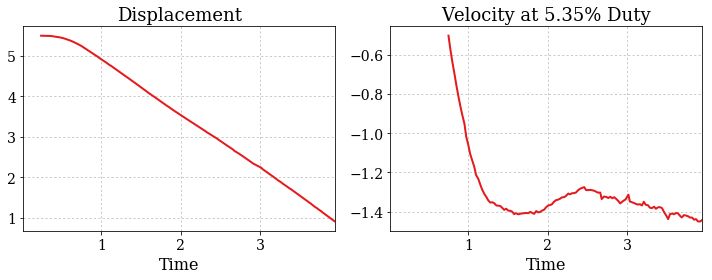

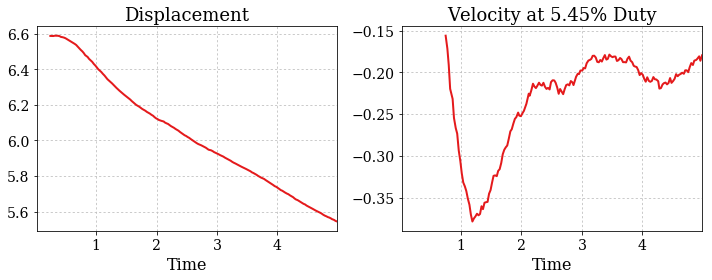

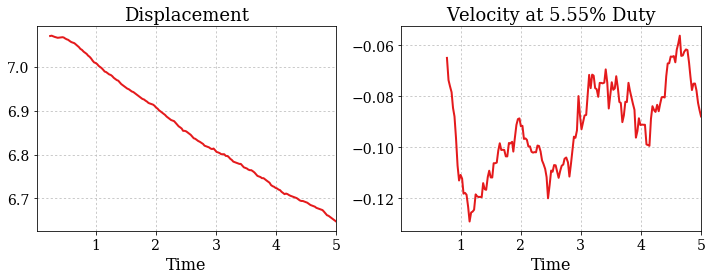

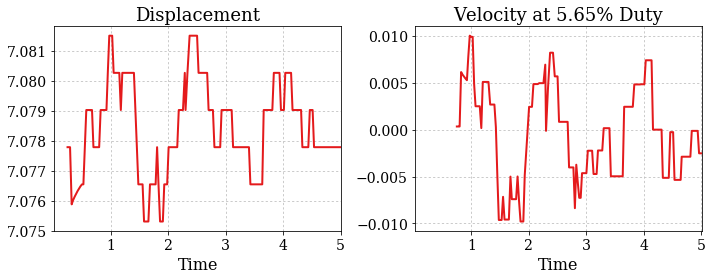

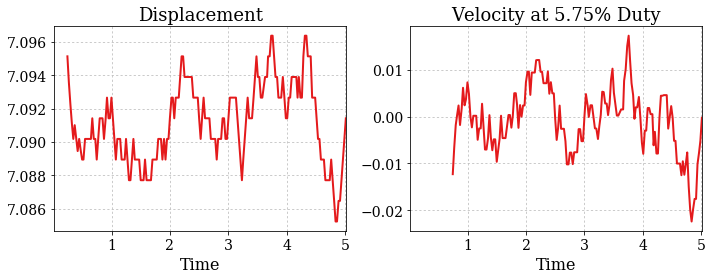

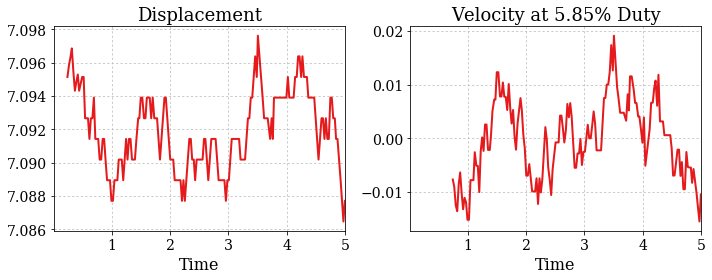

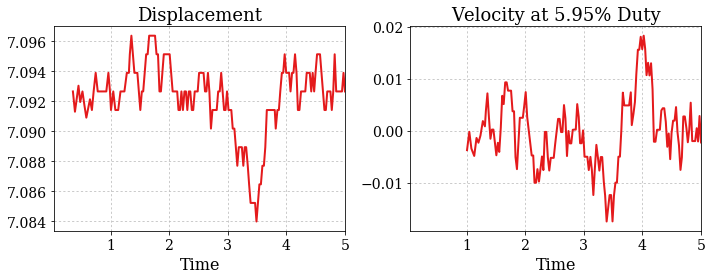

In [248]:
for i in range(0, 15):
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.title('Displacement')
    bk_dfs[i]['Bucket Ms'].rolling(window=20, min_periods=10).mean().plot()
    plt.subplot(122)
    plt.title('Velocity at %.2f%% Duty' % bk_dfs[i]['Bucket Cmd'].values[0])
    (bk_dfs[i]['Bucket Ms'].rolling(window=20, min_periods=10).mean().diff() / bk_dfs[i].index.to_series().diff().values).rolling(window=20, min_periods=20).mean().plot()
    plt.tight_layout()

In [181]:
df.index[[2, 3]]

Float64Index([0.0671439170837, 0.0930528640747], dtype='float64', name=u'Time')

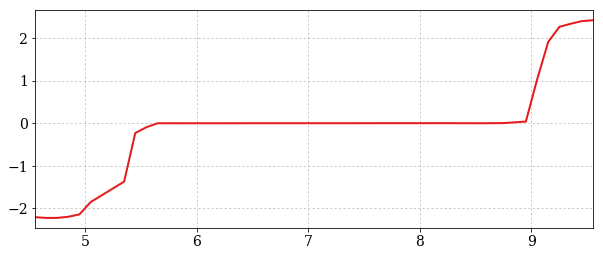

In [205]:
# 0.0333 s per loop
bk_map = np.zeros((len(bk_dfs), 2))

# First 15
for i, df in enumerate(bk_dfs[:15]):
    bk_map[i, 0] = df['Bucket Cmd'].values[0]  # duty cycle
    bk_map[i, 1] = (df['Bucket Ms'].rolling(window=20, min_periods=10).mean().diff() / df.index.to_series().diff().values).iloc[30:].mean()

# Last 14
for i, df in enumerate(bk_dfs[15:]):
    bk_map[i + 15, 0] = df['Bucket Cmd'].values[0]  # duty cycle
    bk_map[i + 15, 1] = (df['Bucket Ms'].rolling(window=20, min_periods=10).mean().diff() / df.index.to_series().diff().values).iloc[40:].mean()

# quick fix
bk_map[6, 1] = -0.12
bk_map[7, 1] = -0.8
bk_map[22, 1] = 0.04
    
bk_map_df = pd.Series(bk_map[:, 1], bk_map[:, 0])

# Drop two observations where the actuator was saturated
bk_map_df.drop(bk_map_df.index[[6, 7]], inplace=True)
plt.figure(figsize=(10, 4))
bk_map_df.plot()

In [209]:
bk_map_df

4.55   -2.204013
4.65   -2.222201
4.75   -2.221676
4.85   -2.195174
4.95   -2.139646
5.05   -1.850223
5.35   -1.370348
5.45   -0.230411
5.55   -0.092837
5.65   -0.000492
5.75    0.000501
5.85   -0.000437
5.95   -0.000034
8.25    0.001589
8.35    0.000487
8.45    0.000785
8.55   -0.000170
8.65    0.001378
8.75    0.004207
8.85    0.021308
8.95    0.040000
9.05    1.018531
9.15    1.907576
9.25    2.262779
9.35    2.334074
9.45    2.396009
9.55    2.417713
dtype: float64

___

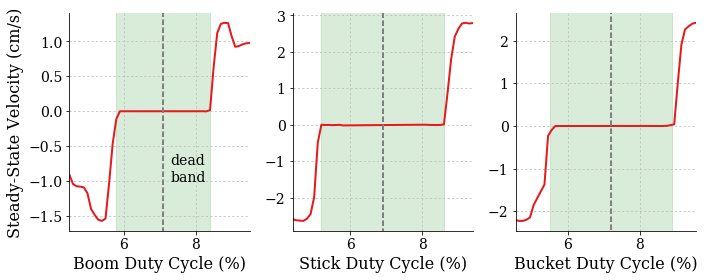

In [235]:
plt.figure(figsize=(10, 4))

# ax1
ax1 = plt.subplot(131)
bm_map_df.plot()
plt.ylabel('Steady-State Velocity (cm/s)')
ax1.set_xlabel('Boom Duty Cycle (%)')

ax1.add_line(plt.Line2D([7.1, 7.1], [-3, 3], color='gray', linestyle='--', linewidth=2))
ax1.add_patch(mpl.patches.Rectangle((5.8, -2), 2.6, 4, color='g', alpha=0.15))
ax1.text(7.3, -1., 'dead\nband', fontsize=14, horizontalalignment='left')

# ax2
ax2 = plt.subplot(132)
sk_map_df.plot()
ax2.set_xlabel('Stick Duty Cycle (%)')

ax2.add_line(plt.Line2D([6.9, 6.9], [-3, 4], color='gray', linestyle='--', linewidth=2))
ax2.add_patch(mpl.patches.Rectangle((5.2, -3), 3.4, 7, color='g', alpha=0.15))

# ax3
ax3 = plt.subplot(133)
bk_map_df.plot()
ax3.set_xlabel('Bucket Duty Cycle (%)')

ax3.add_line(plt.Line2D([7.2, 7.2], [-3, 3], color='gray', linestyle='--', linewidth=2))
ax3.add_patch(mpl.patches.Rectangle((5.5, -3), 3.4, 6, color='g', alpha=0.15))

for ax in [ax1, ax2, ax3]:
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

plt.tight_layout()
plt.savefig('figs/valve_test.pdf')

___

# Swing Test Data

Load data for swing PWM test and plot steady-state vel curve

In [239]:
ls

SISO Controllers.ipynb    pot_calibrate_05_11.csv   valve-pwm-velocity.ipynb
dh_kinematics.html        rotary-valve-gain.ipynb   vel_test_1.csv
figs/                     single-actuator.ipynb     vel_test_2.csv
img/                      string-pot.ipynb          vel_test_sw.csv


In [240]:
sw_data = pd.read_csv('vel_test_sw.csv').set_index('Total Time')
sw_data.head()

,Loop Time,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Flag,Actuator
Total Time,,,,,,,,,,,
0.062245,0.037004,7.0,6.9,7.05,7.5,10.097143,6.393871,4.002566,0.0,1,3
0.101045,0.075806,7.0,6.9,7.05,7.5,10.053429,6.393871,3.979019,0.0,0,3
0.130692,0.105453,7.0,6.9,7.05,7.5,10.097143,6.393871,4.002566,0.0,0,3
0.173336,0.148102,7.0,6.9,7.05,7.5,10.053429,6.393871,3.979019,0.0,0,3
0.214133,0.188900,7.0,6.9,7.05,7.5,10.053429,6.393871,4.002566,0.0,0,3


In [241]:
sw_raw = sw_data.values
sw_ind = np.where(sw_raw[:, -2])[0]
sw_ind

array([   0,   75,  154,  234,  313,  393,  473,  552,  632,  711,  791,
        870,  950, 1030, 1109, 1189, 1268, 1348, 1428, 1505])

In [242]:
sw_raw_split = np.split(sw_raw, sw_ind)
sw_raw_split.pop(0)
sw_raw_split[0].shape

(75, 11)

In [243]:
sw_dfs = []
for i, rs in enumerate(sw_raw_split):
    sw_dfs.append(pd.DataFrame(rs))
    sw_dfs[i].columns = [u'Time', u'Boom Cmd', u'Stick Cmd', u'Bucket Cmd', 
                      u'Swing Cmd', u'Boom Ms', u'Stick Ms', u'Bucket Ms', 
                      u'Swing Ms', u'Flag', u'Actuator']
    sw_dfs[i].set_index(u'Time', inplace=True)

sw_dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Flag,Actuator
Time,,,,,,,,,,
0.037004,7.0,6.9,7.05,7.5,10.097143,6.393871,4.002566,0.0,1.0,3.0
0.075806,7.0,6.9,7.05,7.5,10.053429,6.393871,3.979019,0.0,0.0,3.0
0.105453,7.0,6.9,7.05,7.5,10.097143,6.393871,4.002566,0.0,0.0,3.0
0.148102,7.0,6.9,7.05,7.5,10.053429,6.393871,3.979019,0.0,0.0,3.0
0.188900,7.0,6.9,7.05,7.5,10.053429,6.393871,4.002566,0.0,0.0,3.0


In [244]:
sw_dfs.sort(key=lambda x: x['Swing Cmd'].values[0])

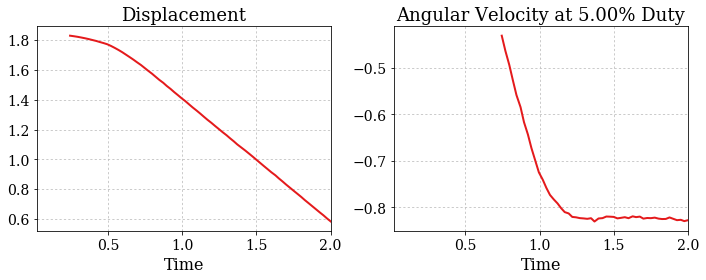

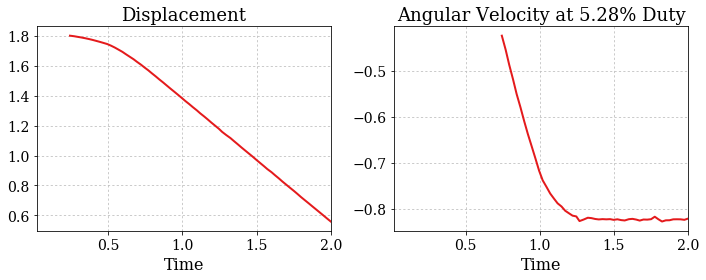

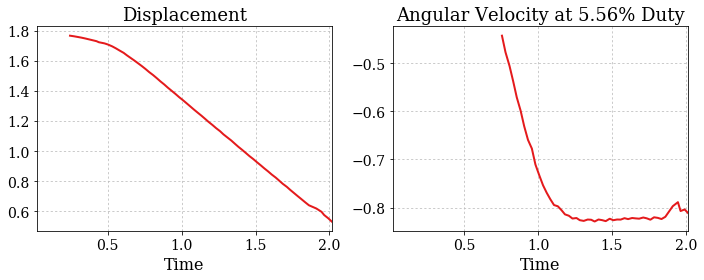

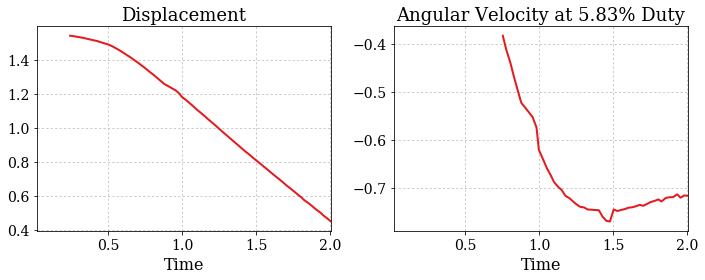

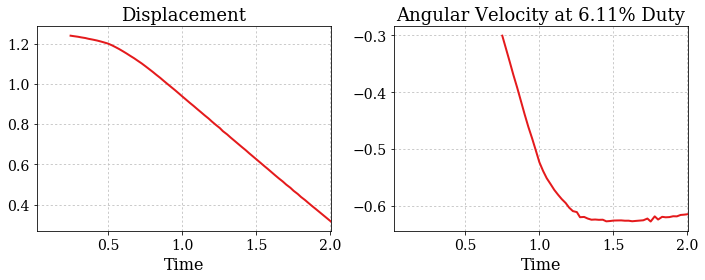

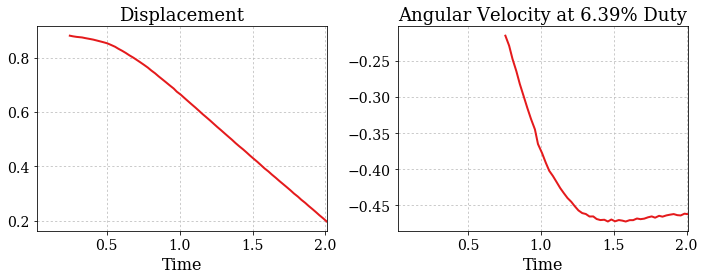

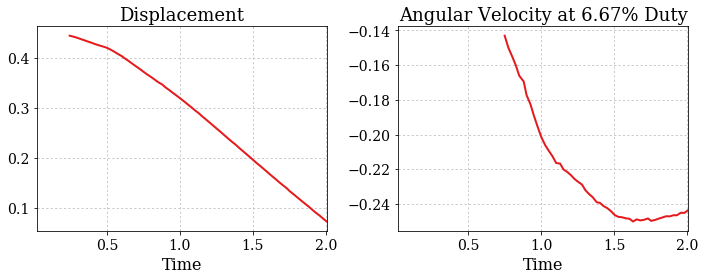

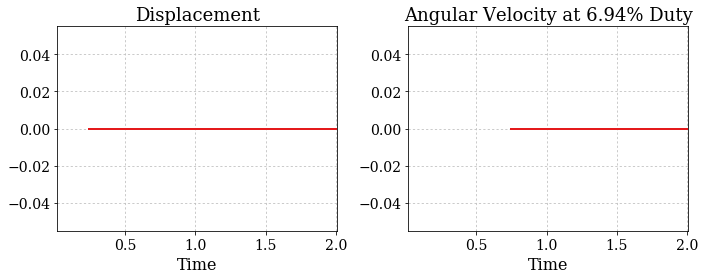

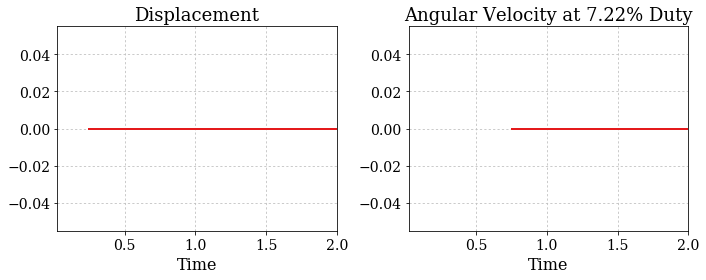

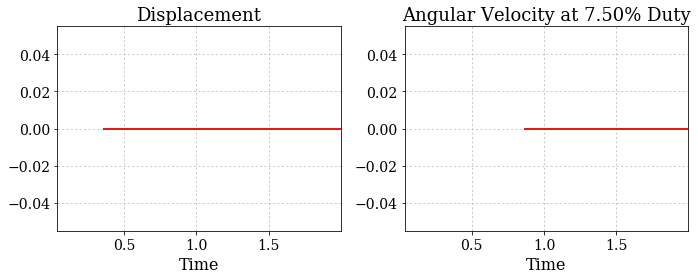

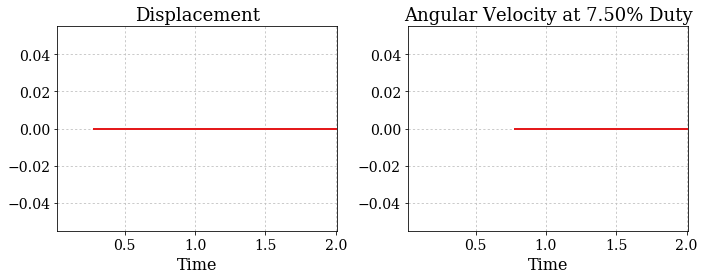

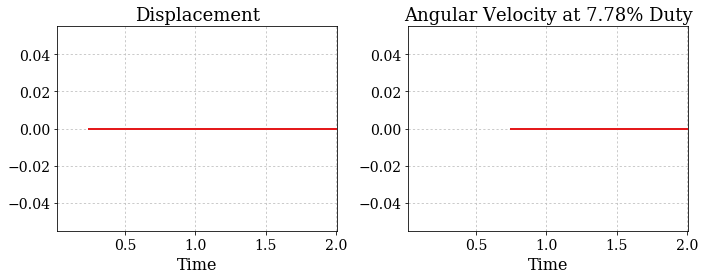

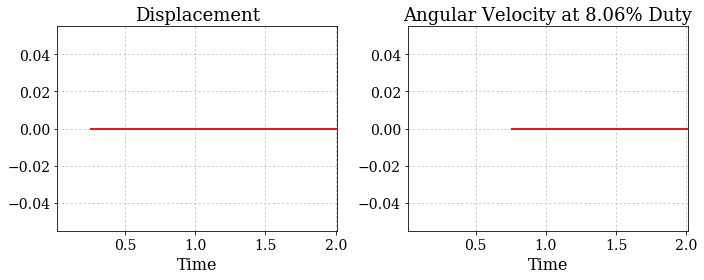

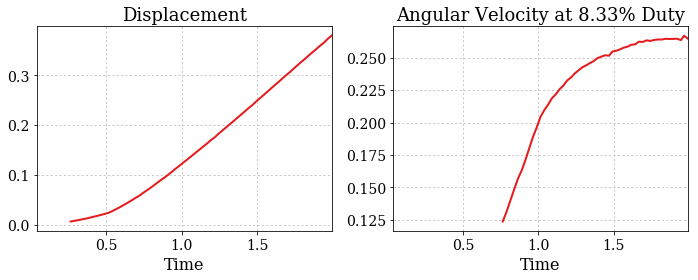

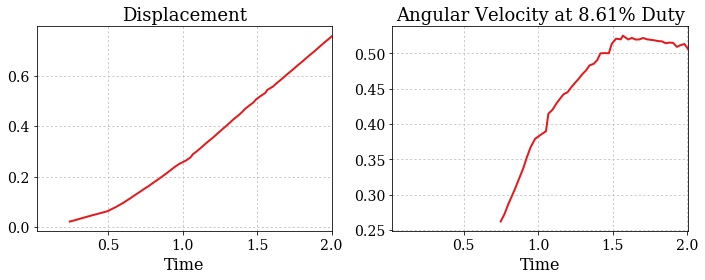

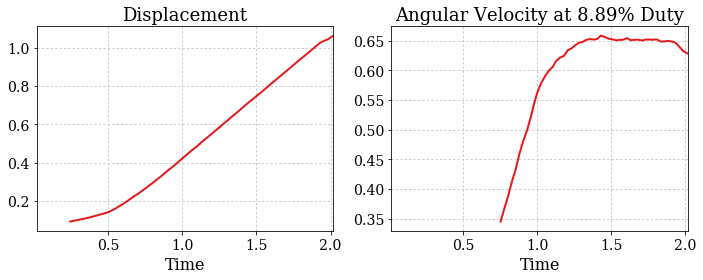

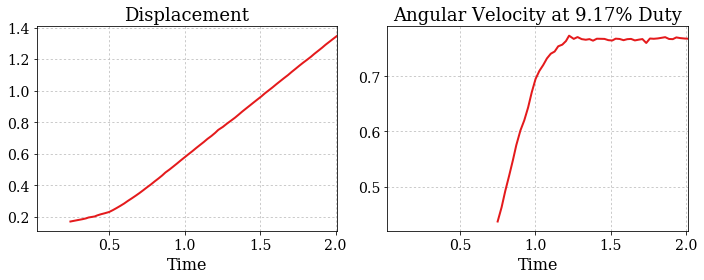

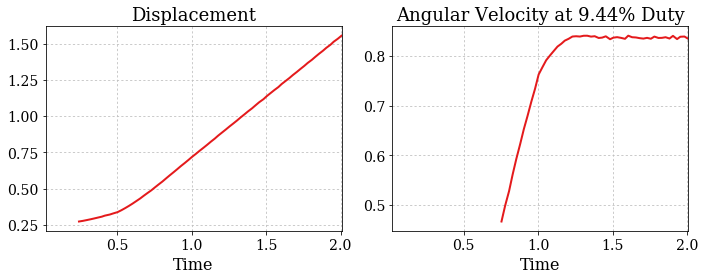

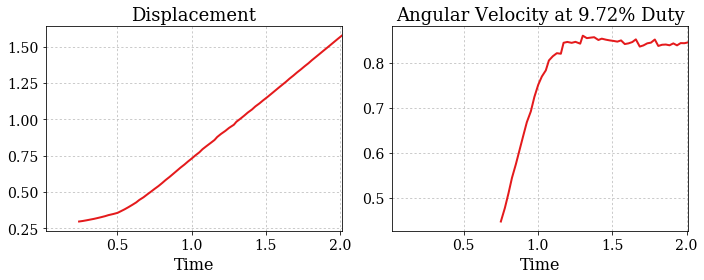

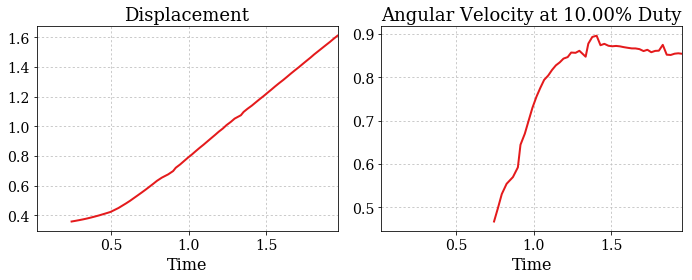

In [250]:
for i in range(0, len(sw_dfs)):
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.title('Displacement')
    sw_dfs[i]['Swing Ms'].rolling(window=20, min_periods=10).mean().plot()
    plt.subplot(122)
    plt.title('Angular Velocity at %.2f%% Duty' % sw_dfs[i]['Swing Cmd'].values[0])
    (sw_dfs[i]['Swing Ms'].rolling(window=20, min_periods=10).mean().diff() / sw_dfs[i].index.to_series().diff().values).rolling(window=20, min_periods=20).mean().plot()
    plt.tight_layout()

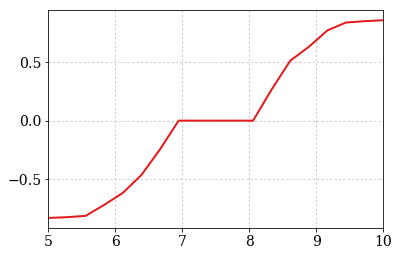

In [251]:
sw_map = np.zeros((len(sw_dfs), 2))

for i, df in enumerate(sw_dfs):
    sw_map[i, 0] = df['Swing Cmd'].values[0]  # duty cycle
    sw_map[i, 1] = (df['Swing Ms'].rolling(window=20, min_periods=10).mean().diff() / df.index.to_series().diff().values).iloc[60:].mean()

sw_map_df = pd.Series(sw_map[:, 1], sw_map[:, 0]).sort_index()
sw_map_df.plot()

___
One more pretty plot

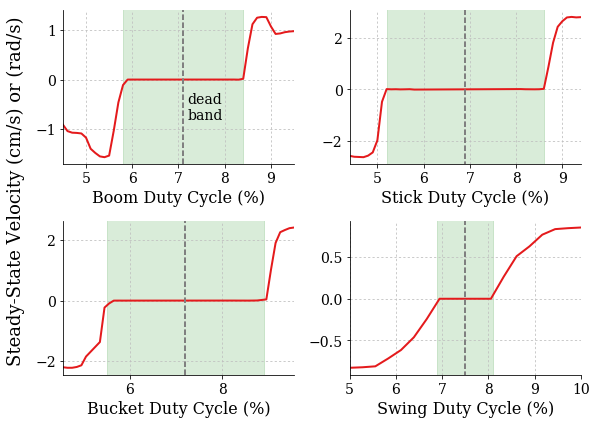

In [269]:
fig = plt.figure(figsize=(8, 6))

# ax1
ax1 = plt.subplot(221)
bm_map_df.plot()
# plt.ylabel('Steady-State Velocity (cm/s)')
ax1.set_xlabel('Boom Duty Cycle (%)')

ax1.add_line(plt.Line2D([7.1, 7.1], [-3, 3], color='gray', linestyle='--', linewidth=2))
ax1.add_patch(mpl.patches.Rectangle((5.8, -2), 2.6, 4, color='g', alpha=0.15))
ax1.text(7.2, -0.8, 'dead\nband', fontsize=14, horizontalalignment='left')

# ax2
ax2 = plt.subplot(222)
sk_map_df.plot()
ax2.set_xlabel('Stick Duty Cycle (%)')

ax2.add_line(plt.Line2D([6.9, 6.9], [-3, 4], color='gray', linestyle='--', linewidth=2))
ax2.add_patch(mpl.patches.Rectangle((5.2, -3), 3.4, 7, color='g', alpha=0.15))

# ax3
ax3 = plt.subplot(223)
bk_map_df.plot()
ax3.set_xlabel('Bucket Duty Cycle (%)')

ax3.add_line(plt.Line2D([7.2, 7.2], [-3, 3], color='gray', linestyle='--', linewidth=2))
ax3.add_patch(mpl.patches.Rectangle((5.5, -3), 3.4, 6, color='g', alpha=0.15))

# ax4
ax4 = plt.subplot(224)
sw_map_df.plot()
ax4.set_xlabel('Swing Duty Cycle (%)')
# ax4.set_ylabel('Steady-State Angular Vel. (rad/s)')

ax4.add_line(plt.Line2D([7.5, 7.5], [-2, 2], color='gray', linestyle='--', linewidth=2))
ax4.add_patch(mpl.patches.Rectangle((6.9, -2), 1.2, 4, color='g', alpha=0.15))

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

fig.text(-0.03, 0.55, 'Steady-State Velocity (cm/s) or (rad/s)', va='center', rotation='vertical', fontsize=18)
plt.tight_layout()
plt.savefig('figs/valve_test_2.pdf')